In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
from scipy import stats

In [3]:
df = pd.read_csv(f'C:\\Users\\riley\\OneDrive\\Desktop\\Data Portfolio Project\\Tables\\clean_and_filtered_airbnb_data_v2.csv')
df.head()

,host_id,host_name,listing_id,listing_url,booked_out_of_30,booked_out_of_60,booked_out_of_90,booked_out_of_365,review_scores_rating_clean,instant_bookable_clean,...,bedrooms_clean,room_type,property_type,host_has_profile_pic_clean,host_identity_verified_clean,neighbourhood_cleansed,neighbourhood_group_cleansed,host_total_listings_count_clean,number_of_reviews_clean,dirty_review_count
0,8967,Shunichi,5178,https://www.airbnb.com/rooms/5178,28,56,83,205,4.23,0,...,1,Private room,Private room in rental unit,1,0,Midtown,Manhattan,1,550,52
1,17601262,Enrico,3495854,https://www.airbnb.com/rooms/3495854,25,39,46,46,4.69,0,...,1,Entire home/apt,Entire loft,1,1,Williamsburg,Brooklyn,2,218,40
2,277379,Agnes,58059,https://www.airbnb.com/rooms/58059,29,58,81,130,4.71,0,...,1,Private room,Private room in rental unit,1,1,Harlem,Manhattan,2,615,39
3,627217,Seith,126443,https://www.airbnb.com/rooms/126443,28,53,76,110,4.33,1,...,2,Entire home/apt,Entire townhouse,1,1,East Village,Manhattan,32,516,36
4,277379,Agnes,476983,https://www.airbnb.com/rooms/476983,30,55,78,271,4.64,0,...,1,Private room,Private room in rental unit,1,1,Harlem,Manhattan,2,607,33


In [4]:
df[['booked_out_of_90', 'number_of_reviews_clean', 'dirty_review_count', 'review_scores_rating_clean', 'instant_bookable_clean', 'price_clean', 'bedrooms_clean', 'host_identity_verified_clean']].describe().round(3)


,booked_out_of_90,number_of_reviews_clean,dirty_review_count,review_scores_rating_clean,instant_bookable_clean,price_clean,bedrooms_clean,host_identity_verified_clean
count,1132.000,1132.000,1132.000,1132.000,1132.000,1132.000,1132.000,1132.000
mean,59.036,121.110,5.088,4.711,0.176,160.981,1.243,0.878
std,27.473,105.172,5.224,0.236,0.381,112.510,0.758,0.327
min,0.000,1.000,1.000,2.000,0.000,21.000,0.000,0.000
25%,37.000,42.000,2.000,4.610,0.000,90.000,1.000,1.000
50%,66.000,92.000,3.000,4.760,0.000,130.000,1.000,1.000
75%,84.000,172.000,7.000,4.870,0.000,195.000,1.000,1.000
max,90.000,617.000,52.000,5.000,1.000,900.000,5.000,1.000


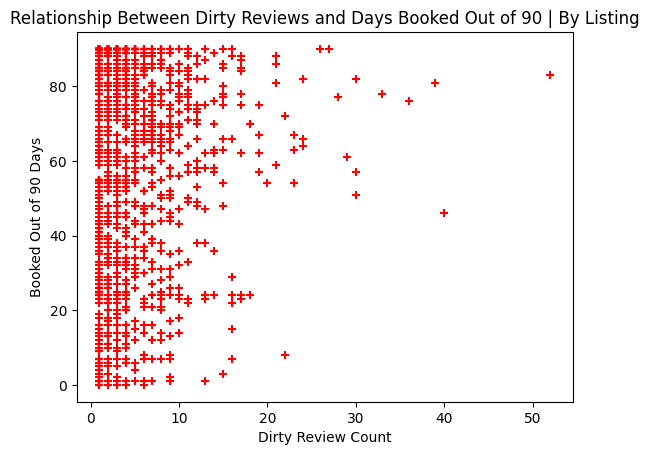

In [5]:
%matplotlib inline
plt.title('Relationship Between Dirty Reviews and Days Booked Out of 90 | By Listing')
plt.xlabel('Dirty Review Count')
plt.ylabel('Booked Out of 90 Days')
plt.scatter(df.dirty_review_count , df.booked_out_of_90, color ='red',marker='+')

In [6]:
reg_1 = linear_model.LinearRegression()
reg_1.fit(df[['dirty_review_count']],df.booked_out_of_90)

LinearRegression()

In [7]:
reg_1.predict([[0]])

c:\Users\riley\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([57.32840291])

In [8]:
reg_1.coef_.round(3)

array([0.336])

In [9]:
reg_1.intercept_.round(3)

57.328

c:\Users\riley\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- booked_out_of_90
Feature names seen at fit time, yet now missing:
- dirty_review_count

  warnings.warn(message, FutureWarning)


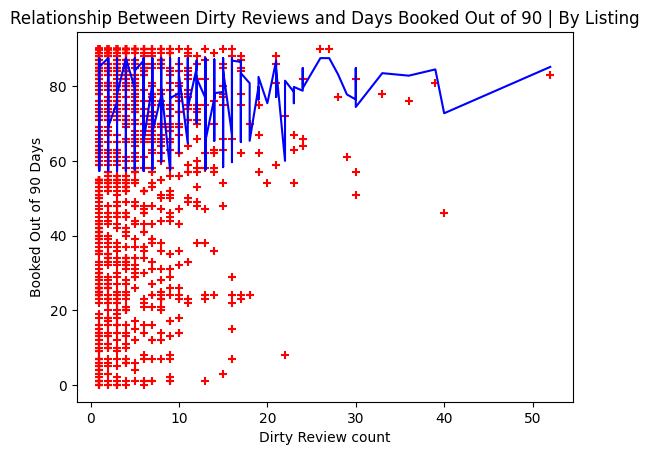

In [10]:
%matplotlib inline
plt.title('Relationship Between Dirty Reviews and Days Booked Out of 90 | By Listing')
plt.xlabel('Dirty Review count')
plt.ylabel('Booked Out of 90 Days')
plt.scatter(df.dirty_review_count, df.booked_out_of_90, color ='red',marker='+')
plt.plot(df.dirty_review_count,reg_1.predict(df[['booked_out_of_90']]),color ='blue')

In [11]:
reg_1 = linear_model.LinearRegression()
reg_1.fit(df[['dirty_review_count', 'number_of_reviews_clean', 'bedrooms_clean', 'price_clean', 'review_scores_rating_clean', 'instant_bookable_clean', 'host_identity_verified_clean' ]], df.booked_out_of_90)

LinearRegression()

In [12]:
reg_1.coef_.round(3)

array([ 0.066,  0.018,  2.71 , -0.034, 10.619, -2.248,  2.28 ])

In [13]:
reg_1.intercept_

6.864656584511316

In [14]:
reg_1.predict([[30, 50, 1, 60, 4.2, 0, 1 ]]).round(3)

c:\Users\riley\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([57.329])

In [15]:
###reg_2 WITH DUMMY VARIABLES

In [16]:
dummies_room_type =pd.get_dummies(df.room_type)
dummies_room_type.head()

,Entire home/apt,Hotel room,Private room,Shared room
0,0,0,1,0
1,1,0,0,0
2,0,0,1,0
3,1,0,0,0
4,0,0,1,0


In [17]:
dummies_neighbourhood_group_df =pd.get_dummies(df.neighbourhood_group_cleansed)
dummies_neighbourhood_group_df.head()

,Bronx,Brooklyn,Manhattan,Queens,Staten Island
0,0,0,1,0,0
1,0,1,0,0,0
2,0,0,1,0,0
3,0,0,1,0,0
4,0,0,1,0,0


In [18]:
merged_room_type_dummy_df =pd.concat([df,dummies_room_type], axis='columns')
merged_room_type_dummy_df.head()

,host_id,host_name,listing_id,listing_url,booked_out_of_30,booked_out_of_60,booked_out_of_90,booked_out_of_365,review_scores_rating_clean,instant_bookable_clean,...,host_identity_verified_clean,neighbourhood_cleansed,neighbourhood_group_cleansed,host_total_listings_count_clean,number_of_reviews_clean,dirty_review_count,Entire home/apt,Hotel room,Private room,Shared room
0,8967,Shunichi,5178,https://www.airbnb.com/rooms/5178,28,56,83,205,4.23,0,...,0,Midtown,Manhattan,1,550,52,0,0,1,0
1,17601262,Enrico,3495854,https://www.airbnb.com/rooms/3495854,25,39,46,46,4.69,0,...,1,Williamsburg,Brooklyn,2,218,40,1,0,0,0
2,277379,Agnes,58059,https://www.airbnb.com/rooms/58059,29,58,81,130,4.71,0,...,1,Harlem,Manhattan,2,615,39,0,0,1,0
3,627217,Seith,126443,https://www.airbnb.com/rooms/126443,28,53,76,110,4.33,1,...,1,East Village,Manhattan,32,516,36,1,0,0,0
4,277379,Agnes,476983,https://www.airbnb.com/rooms/476983,30,55,78,271,4.64,0,...,1,Harlem,Manhattan,2,607,33,0,0,1,0


In [21]:
merged_neighbourhood_df = pd.concat([merged_room_type_dummy_df, dummies_neighbourhood_group_df], axis='columns')
merged_neighbourhood_df = merged_neighbourhood_df.drop(['host_id', 'host_name', 'listing_id', 'listing_url', 'booked_out_of_30', 'booked_out_of_60', 'booked_out_of_365' , 'host_has_profile_pic_clean', 'property_type','Shared room', 'room_type', 'neighbourhood_cleansed', 
'neighbourhood_group_cleansed', 'host_total_listings_count_clean'], axis='columns')
merged_neighbourhood_df.head()

,booked_out_of_90,review_scores_rating_clean,instant_bookable_clean,price_clean,bedrooms_clean,host_identity_verified_clean,number_of_reviews_clean,dirty_review_count,Entire home/apt,Hotel room,Private room,Bronx,Brooklyn,Manhattan,Queens,Staten Island
0,83,4.23,0,68,1,0,550,52,0,0,1,0,0,1,0,0
1,46,4.69,0,181,1,1,218,40,1,0,0,0,1,0,0,0
2,81,4.71,0,60,1,1,615,39,0,0,1,0,0,1,0,0
3,76,4.33,1,459,2,1,516,36,1,0,0,0,0,1,0,0
4,78,4.64,0,59,1,1,607,33,0,0,1,0,0,1,0,0


In [ ]:
final_df = merged_neighbourhood_df.drop(['Staten Island'], axis='columns')
final_df.head()

,booked_out_of_90,review_scores_rating_clean,instant_bookable_clean,price_clean,bedrooms_clean,host_identity_verified_clean,number_of_reviews_clean,dirty_review_count,Entire home/apt,Hotel room,Private room,Bronx,Brooklyn,Manhattan,Queens
0,83,4.23,0,68,1,0,550,49,0,0,1,0,0,1,0
1,46,4.69,0,181,1,1,218,38,1,0,0,0,1,0,0
2,76,4.33,1,459,2,1,516,31,1,0,0,0,0,1,0
3,82,4.72,0,97,1,1,471,28,0,0,1,0,1,0,0
4,51,4.50,1,97,1,1,513,27,0,0,1,0,1,0,0


In [ ]:
from sklearn.linear_model import LinearRegression
reg_2 = LinearRegression()


In [ ]:
x = final_df.drop('booked_out_of_90', axis ='columns')
x.head()

,review_scores_rating_clean,instant_bookable_clean,price_clean,bedrooms_clean,host_identity_verified_clean,number_of_reviews_clean,dirty_review_count,Entire home/apt,Hotel room,Private room,Bronx,Brooklyn,Manhattan,Queens
0,4.23,0,68,1,0,550,49,0,0,1,0,0,1,0
1,4.69,0,181,1,1,218,38,1,0,0,0,1,0,0
2,4.33,1,459,2,1,516,31,1,0,0,0,0,1,0
3,4.72,0,97,1,1,471,28,0,0,1,0,1,0,0
4,4.50,1,97,1,1,513,27,0,0,1,0,1,0,0


In [ ]:
y = final_df.booked_out_of_90
y.head()

0    83
1    46
2    76
3    82
4    51
Name: booked_out_of_90, dtype: int64

In [ ]:
reg_2.fit(x,y)

LinearRegression()

In [ ]:
reg_2.predict([[4.5, 0, 80, 1, 1, 65, 10, 0,0,1, 0, 0,1,0]])

c:\Users\riley\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([57.23916443])

In [ ]:
reg_2.coef_.round(3)

array([13.046, -1.909, -0.072,  3.535,  1.148,  0.026, -0.201, 25.447,
       -9.048, 13.843, -0.231, 19.147, 24.069,  7.953])

In [ ]:
reg_2.score(x,y).round(3)

0.126

In [ ]:
corr_df = pd.DataFrame(columns=['r', 'p'])
for col in merged_neighbourhood_df:
    print(col)
    if pd.api.types.is_numeric_dtype(merged_neighbourhood_df[col]) and col != 'booked_out_of_90':
        r, p = stats.pearsonr(merged_neighbourhood_df.booked_out_of_90, merged_neighbourhood_df[col])
        corr_df.loc[col] = [round(r, 3), round(p, 3)]

corr_df

booked_out_of_90
review_scores_rating_clean
instant_bookable_clean
price_clean
bedrooms_clean
host_identity_verified_clean
number_of_reviews_clean
dirty_review_count
Entire home/apt
Hotel room
Private room
Bronx
Brooklyn
Manhattan
Queens
Staten Island


,r,p
review_scores_rating_clean,0.089,0.003
instant_bookable_clean,-0.045,0.135
price_clean,-0.101,0.001
bedrooms_clean,0.024,0.422
host_identity_verified_clean,0.015,0.629
number_of_reviews_clean,0.093,0.002
dirty_review_count,0.045,0.138
Entire home/apt,0.132,0.000
Hotel room,-0.074,0.014
Private room,-0.114,0.000
